# Trabalho 2

## Aluno : Gabriel Borin Macedo
## RA : 197201

# Descrição : Esse _script_ é o relatório do _trabalho 2_.

## Parte 0 : Criação da função de plot para o programa
Para esta célula, será criada uma função que faz o plot de images. Essa função foi criada para evitar a repetição de código desnecessário

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def plot_img(img: np.ndarray, title_msg: str = "") -> None:
    """
    Função que faz o plot de uma imagem

    :param img: np.ndarray que representa a imagem que será plotada
    :param show_title: booleana que indica se será criado um título para o plot da imagem
    :param title_msg: string que representa o título da imagem
    :return: None
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap="gray", vmin=img.min(), vmax=img.max())
    if (title_msg):
        plt.title(title_msg)
    plt.axis("off")
    plt.show()


def overlay(img1: np.ndarray, img2: np.ndarray, alpha: float, **kwargs: dict) -> None:
    # figure and custom params
    if 'size' in kwargs.keys():
        squaresize = kwargs.pop('size')
        fig = plt.figure(figsize=(squaresize, squaresize))
    else:
        fig = plt.figure()

    if "save_fig" in kwargs.keys():
        save_fig_name = kwargs.pop("save_fig")

    else:
        save_fig_name = ""

    # default imshow params
    params = {'interpolation': 'none', 'aspect': 'equal'}
    # inserting user kwargs
    params.update(kwargs)
    # original image
    params.update({'cmap': 'gray', 'alpha': 1})
    plt.imshow(img1, **params)
    # segmentation layer (colored)
    params.update({'alpha': alpha * (img2 > 0)})  # masking alpha (filtering out the background (0) values)
    params.update(kwargs)  # inserting user kwargs (and overwriting cmap for the colored image)
    plt.imshow(img2, **params)
    plt.axis('off')
    plt.tight_layout()

    if save_fig_name:
        plt.savefig(save_fig_name)

    plt.show()


## Parte 1 : Aplicação do método Global
Inicialmente, será definido a função do método global sendo

In [12]:
def global_method(img: np.ndarray, t: int) -> np.ndarray:
    """

    :param img:
    :param t:
    :return:
    """
    label_img = img.copy()
    label_img[label_img <= t] = 1
    label_img[label_img > t] = 0
    #print("min = {} || max = {}".format(label_img.min(), label_img.max()))
    return label_img

Agora, vamos carregar uma imagem de exemplo

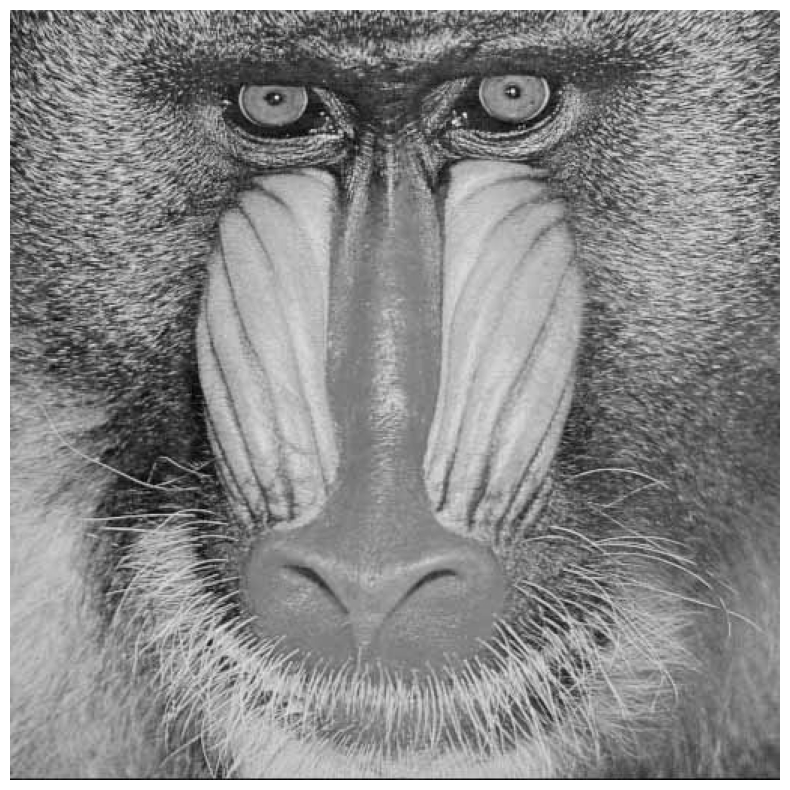

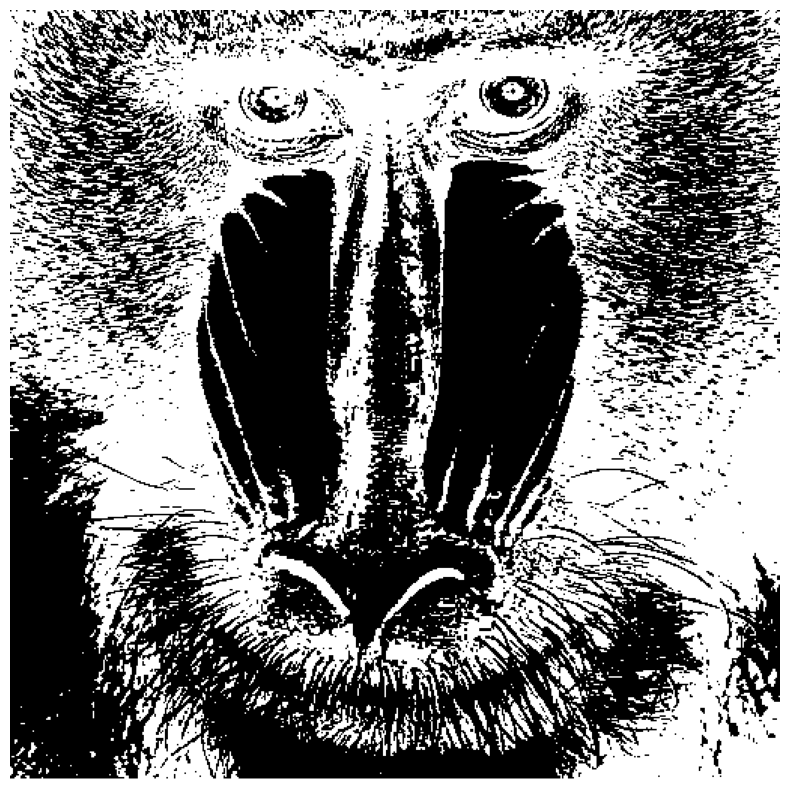

0
1


In [13]:
img = cv2.imread("Imagens/baboon.pgm", -1)
plot_img(img)
mask = global_method(img, 128)
plot_img(mask)
print(mask.min())
print(mask.max())

## Parte 2 : Método de Bernsen
Será utilizado o pacote para isso

In [14]:
%pip install mahotas

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, http://gcc.lnls.br:3128/simple
Note: you may need to restart the kernel to use updated packages.


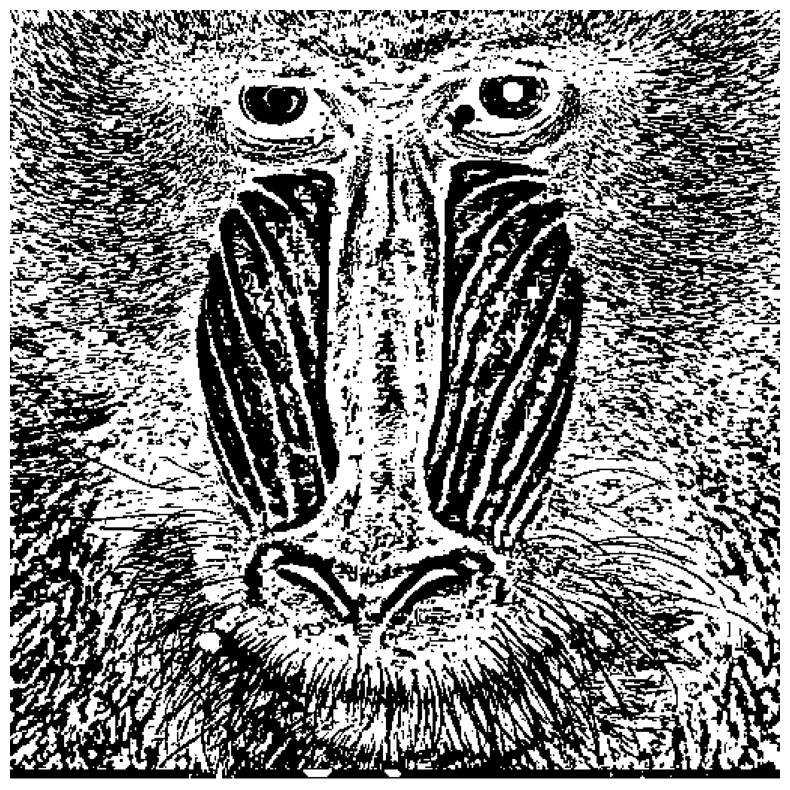

False
True


In [15]:
from mahotas.thresholding import bernsen

mask = bernsen(img, 7, 200)
plot_img(mask)
print(mask.min())
print(mask.max())

# Parte 3 : Método de Niblack

In [16]:
%pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, http://gcc.lnls.br:3128/simple
Note: you may need to restart the kernel to use updated packages.


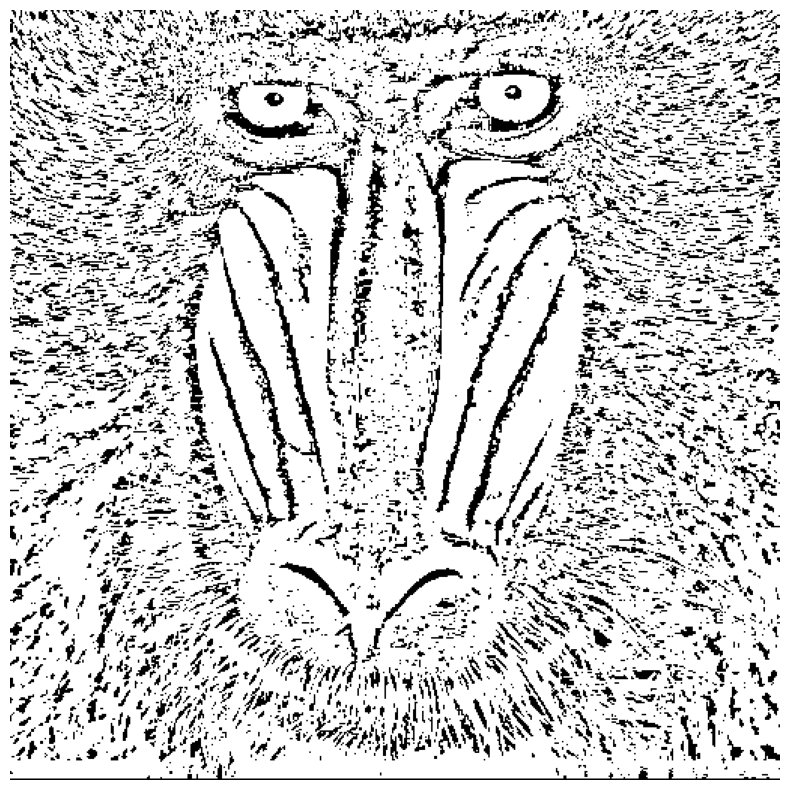

0
1


In [17]:
from skimage.filters import threshold_niblack

window_size = 25
mask = threshold_niblack(img, window_size=window_size, k=0.8)

binary_niblack = (img > mask).astype(np.uint8)
plot_img(binary_niblack)

print(binary_niblack.min())
print(binary_niblack.max())

# Parte 4 : Método de Sauvola e Pietaksinen
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_niblack_sauvola.html

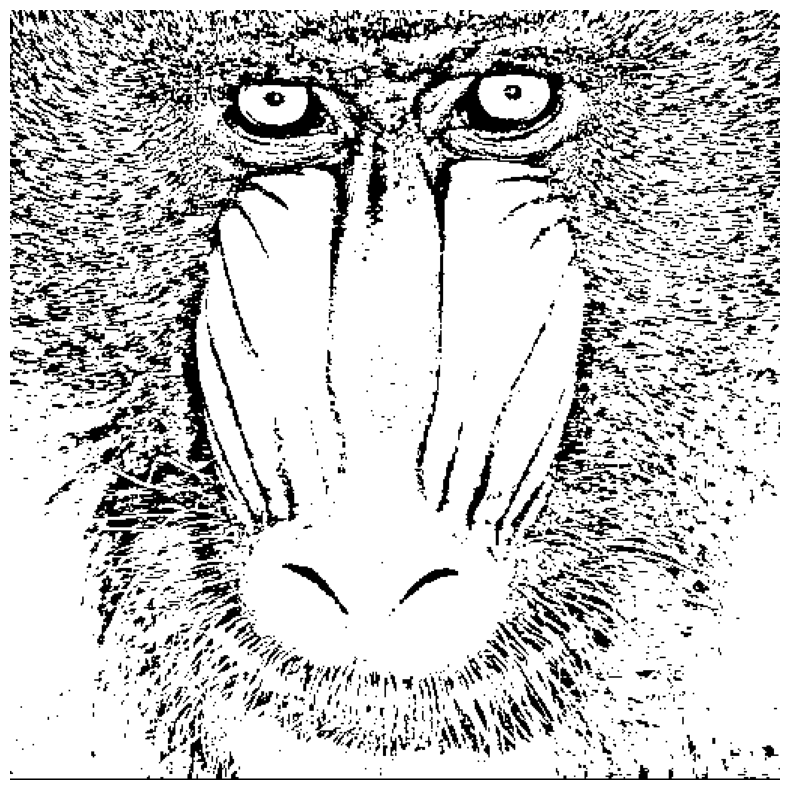

0
1


In [18]:
from skimage.filters import threshold_sauvola

window_size = 25
mask = threshold_sauvola(img, window_size=window_size)

binary_sauvola = (img > mask).astype(np.uint8)
plot_img(binary_sauvola)
print(binary_sauvola.min())
print(binary_sauvola.max())

# Parte 5 : Método de Phansalskar, More e Sabale
TODO : Para os outros métodos, o skimage já tem os filtros de média e contraste
https://craftofcoding.wordpress.com/2021/09/28/thresholding-algorithms-phansalkar-local/
https://scikit-image.org/docs/dev/auto_examples/applications/plot_thresholding.html#sphx-glr-auto-examples-applications-plot-thresholding-py

## Parte 6 : Método do contraste
https://towardsdatascience.com/clahe-and-thresholding-in-python-3bf690303e40

# Parte 7 : Método da média
https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_local

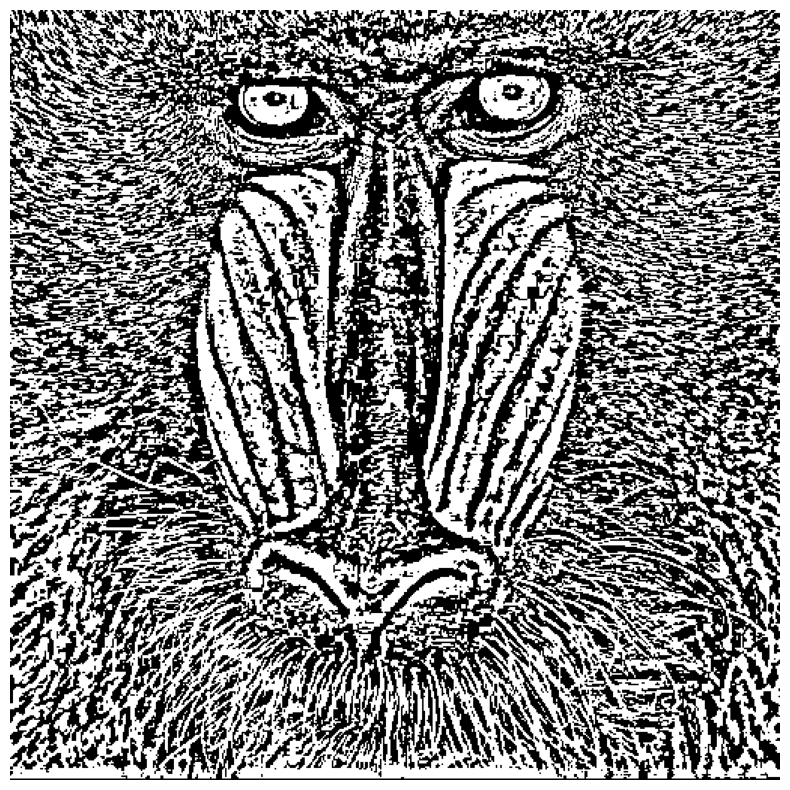

1


In [19]:
from skimage.filters import threshold_local

thresh = threshold_local(img, block_size=15, method="mean", mode="reflect")
binary = (img > thresh).astype(np.uint8)

plot_img(binary)
print(binary.max())

# Parte 8 : Método da mediana

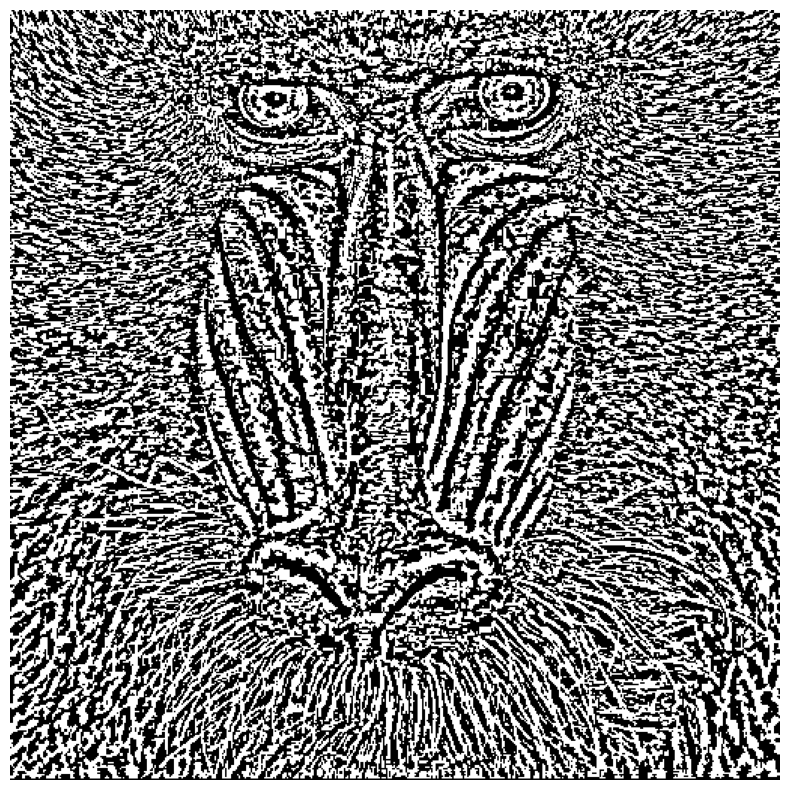

1


In [20]:
thresh = threshold_local(img, block_size=13, method="median", mode="reflect")
binary = (img > thresh).astype(np.uint8)

plot_img(binary)
print(binary.max())